# Demographic Prisoner's Dilemma

The Demographic Prisoner's Dilemma is a family of variants on the classic two-player [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner's_dilemma), first developed by [Joshua Epstein](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.8.8629&rep=rep1&type=pdf). The model consists of agents, each with a strategy of either Cooperate or Defect. Each agent's payoff is based on its strategy and the strategies of its spatial neighbors. After each step of the model, the agents adopt the strategy of their neighbor with the highest total score. 

The specific variant presented here is adapted from the [Evolutionary Prisoner's Dilemma](http://ccl.northwestern.edu/netlogo/models/PDBasicEvolutionary) model included with NetLogo. Its payoff table is a slight variant of the traditional PD payoff table:

<table>
    <tr><td></td><td>**Cooperate**</td><td>**Defect**</td></tr>
    <tr><td>**Cooperate**</td><td>1, 1</td><td>0, *D*</td></tr>
    <tr><td>**Defect**</td><td>*D*, 0</td><td>0, 0</td></tr>
</table>

Where *D* is the defection bonus, generally set higher than 1. In these runs, the defection bonus is set to $D=1.6$.

The Demographic Prisoner's Dilemma demonstrates how simple rules can lead to the emergence of widespread cooperation, despite the Defection strategy dominiating each individual interaction game. However, it is also interesting for another reason: it is known to be sensitive to the activation regime employed in it.

Below, we demonstrate this by instantiating the same model (with the same random seed) three times, with three different activation regimes: 

* Sequential activation, where agents are activated in the order they were added to the model;
* Random activation, where they are activated in random order every step;
* Simultaneous activation, simulating them all being activated simultaneously.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pd_grid.model import PdGrid

%matplotlib inline

## Helper functions

In [2]:
bwr = plt.get_cmap("bwr")

def draw_grid(model, fig, ax=None):
    """
    Draw the current state of the grid, with Defecting agents in red
    and Cooperating agents in blue.
    """
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 6))
    grid = np.zeros((model.grid.width, model.grid.height))
    for agent, (x, y) in model.grid.coord_iter():
        if agent.move == "D":
            grid[y][x] = 1
        else:
            grid[y][x] = 0
    ax.pcolormesh(grid, cmap=bwr, vmin=0, vmax=1)
    ax.axis("off")
    ax.set_title(f"Steps: {model.schedule.steps}")

In [13]:
def run_model(model):
    """
    Run an experiment with a given model, and plot the results.
    """
    fig1 = plt.figure(figsize=(12, 8))

    ax1 = fig1.add_subplot(231)
    ax2 = fig1.add_subplot(232)
    ax3 = fig1.add_subplot(233)
    #ax4 = fig.add_subplot(212)

    draw_grid(model,fig1, ax1)
    model.run(10)
    draw_grid(model,fig1, ax2)
    model.run(10)
    draw_grid(model,fig1, ax3)

    plt.show()  # Display the first figure

    # Second figure for line plots
    fig2 = plt.figure(figsize=(12, 15))

    # Add subplots for line plots
    ax4 = fig2.add_subplot(311)  # First half of the figure
    ax5 = fig2.add_subplot(312)  # Second half of the figure
    ax6 = fig2.add_subplot(313)  # Third 

  
    # Plot line plots
    df = model.datacollector.get_model_vars_dataframe()
    x_ticks = len(df["total_pay_off"]) #setting the x_ticks
    df["Cooperating_Agents"].plot(ax=ax4)
    ax4.set_xlabel("Time Steps")
    ax4.set_title("Cooperating Agents over Time")
    ax4.set_xticks(range(x_ticks))

    df["total_pay_off"].plot(ax=ax5)
    ax5.set_xlabel("Time Steps")
    ax5.set_title("Total Payoff Over Time")
    ax5.set_xticks(range(x_ticks))

    df["Static_Agents"].plot(ax=ax6)
    ax6.set_xlabel("Time Steps")
    ax6.set_title("Static Agents Over Time")
    ax6.set_xticks(range(x_ticks))

    plt.show()  # Display the second figure
   


In [5]:
# Set the random seed
seed = 49

## Sequential Activation

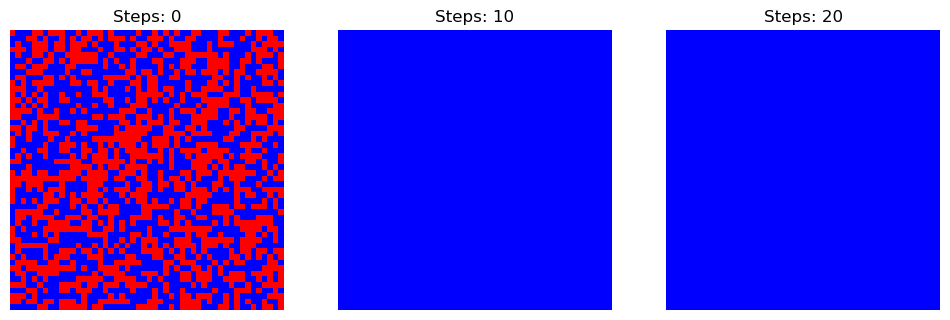

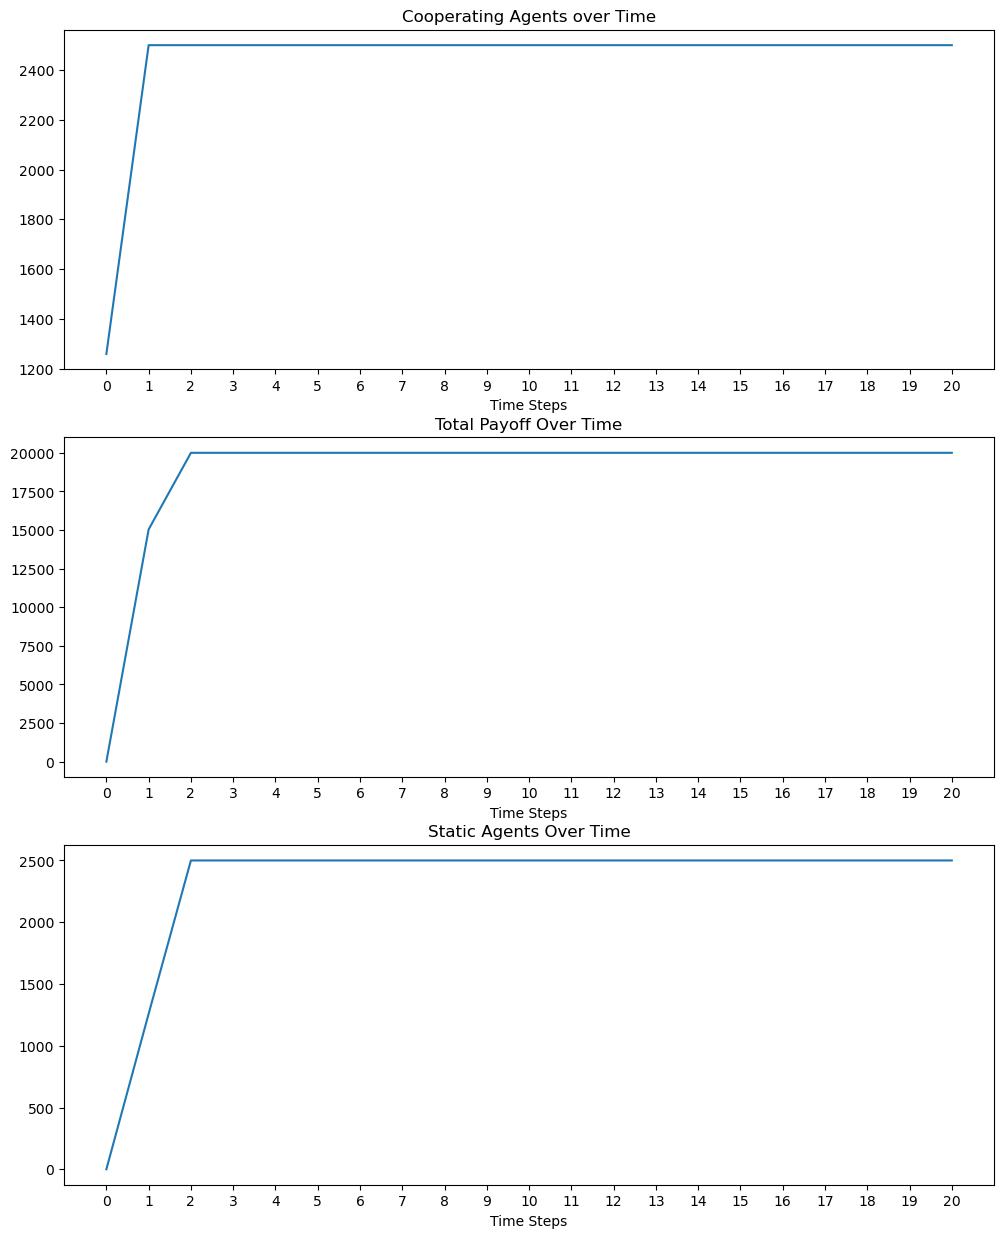

In [14]:
m = PdGrid(50, 50, "Sequential", seed=seed, radius=1)
run_model(m)

In [6]:
model_df = m.datacollector.get_model_vars_dataframe()
agent_df = m.datacollector.get_agent_vars_dataframe()

agent_df.loc[1]

,pos,score,increment,count,current_best_neighbor_move,current_best_neighbor_pos,current_best_neighbor_score
AgentID,,,,,,,
"(0, 0)","(0, 0)",4.8,4.8,None,D,"(45, 45)",0.0
"(0, 1)","(0, 1)",3.2,3.2,None,D,"(0, 0)",4.8
"(0, 2)","(0, 2)",0.0,0.0,None,D,"(0, 0)",4.8
"(0, 3)","(0, 3)",0.0,0.0,None,D,"(0, 0)",4.8
"(0, 4)","(0, 4)",1.6,1.6,None,D,"(0, 0)",4.8
...,...,...,...,...,...,...,...
"(49, 45)","(49, 45)",1.6,1.6,None,D,"(0, 44)",11.2
"(49, 46)","(49, 46)",1.6,1.6,None,D,"(0, 44)",11.2
"(49, 47)","(49, 47)",1.6,1.6,None,D,"(0, 44)",11.2


## Random Activation

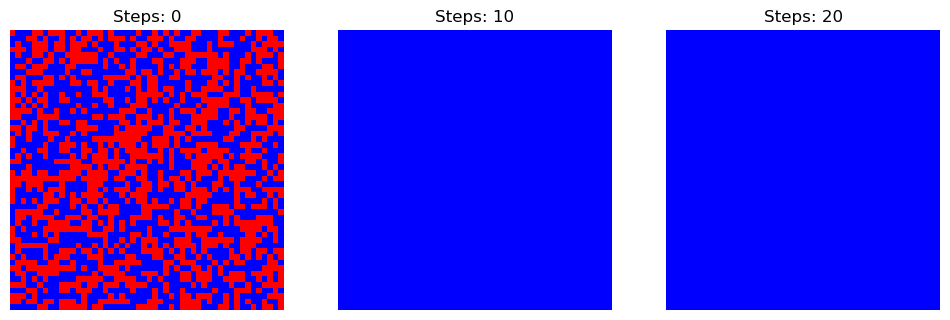

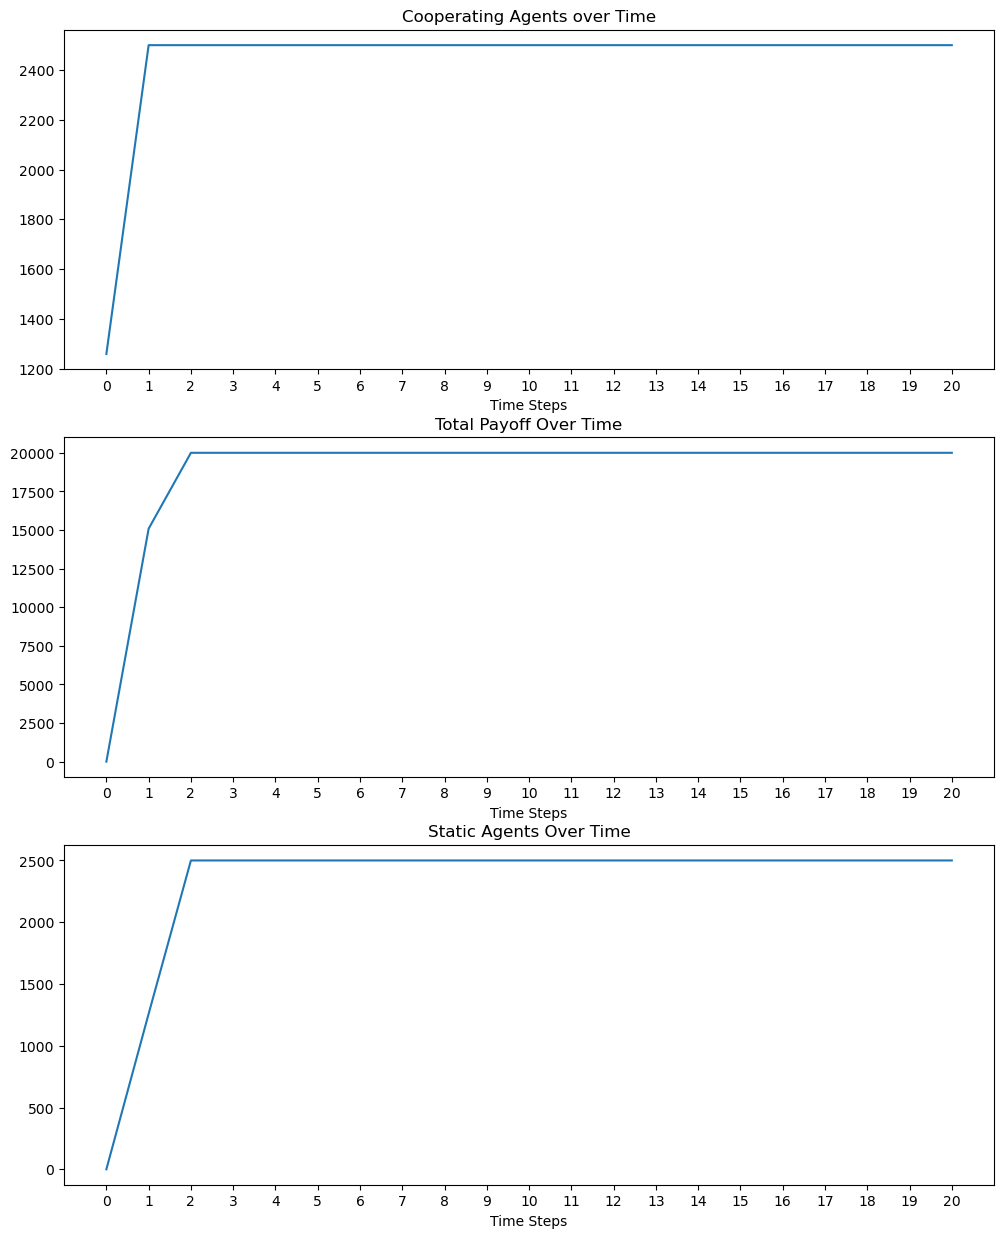

In [15]:
m = PdGrid(50, 50, "Random", seed=seed, radius=25)
run_model(m)

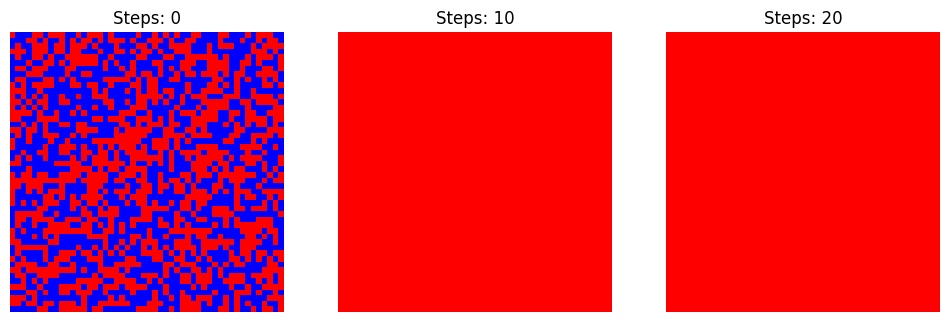

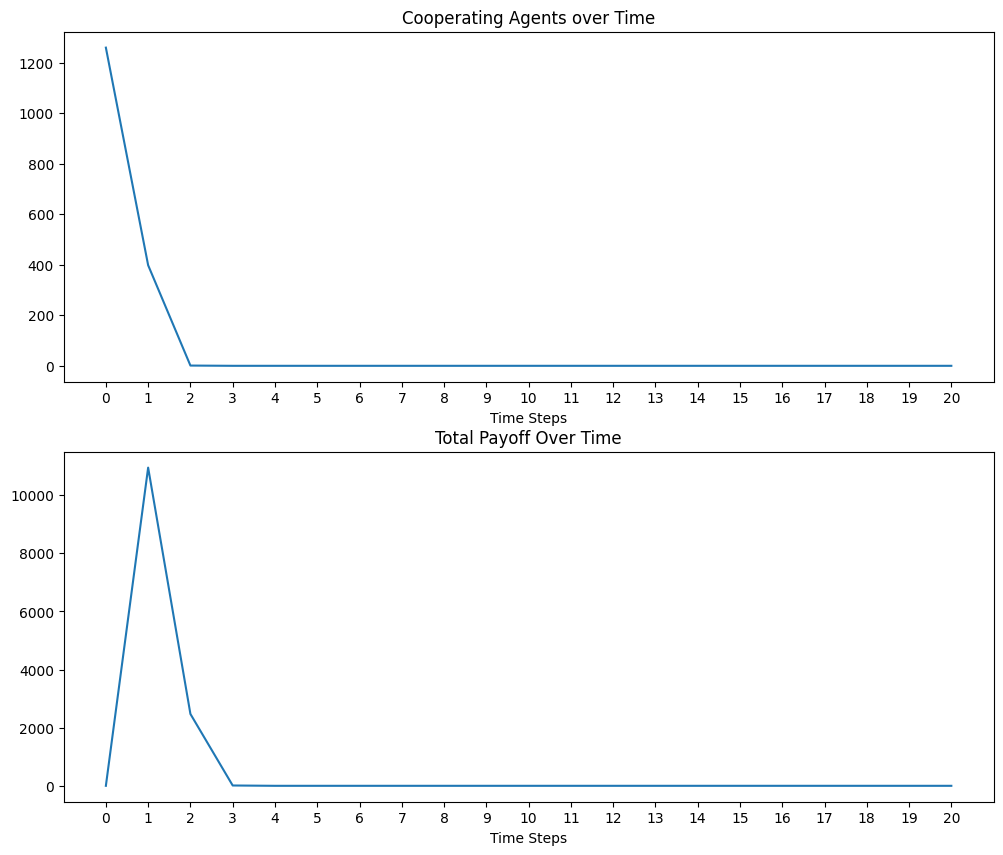

In [12]:
m = PdGrid(50, 50, "Random", seed=seed, radius=2)
run_model(m)

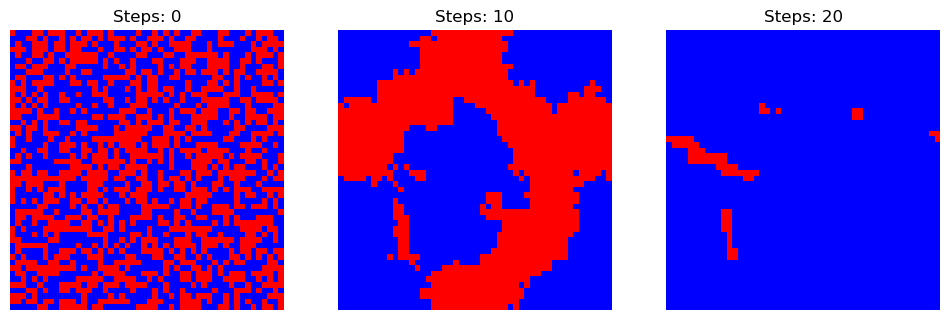

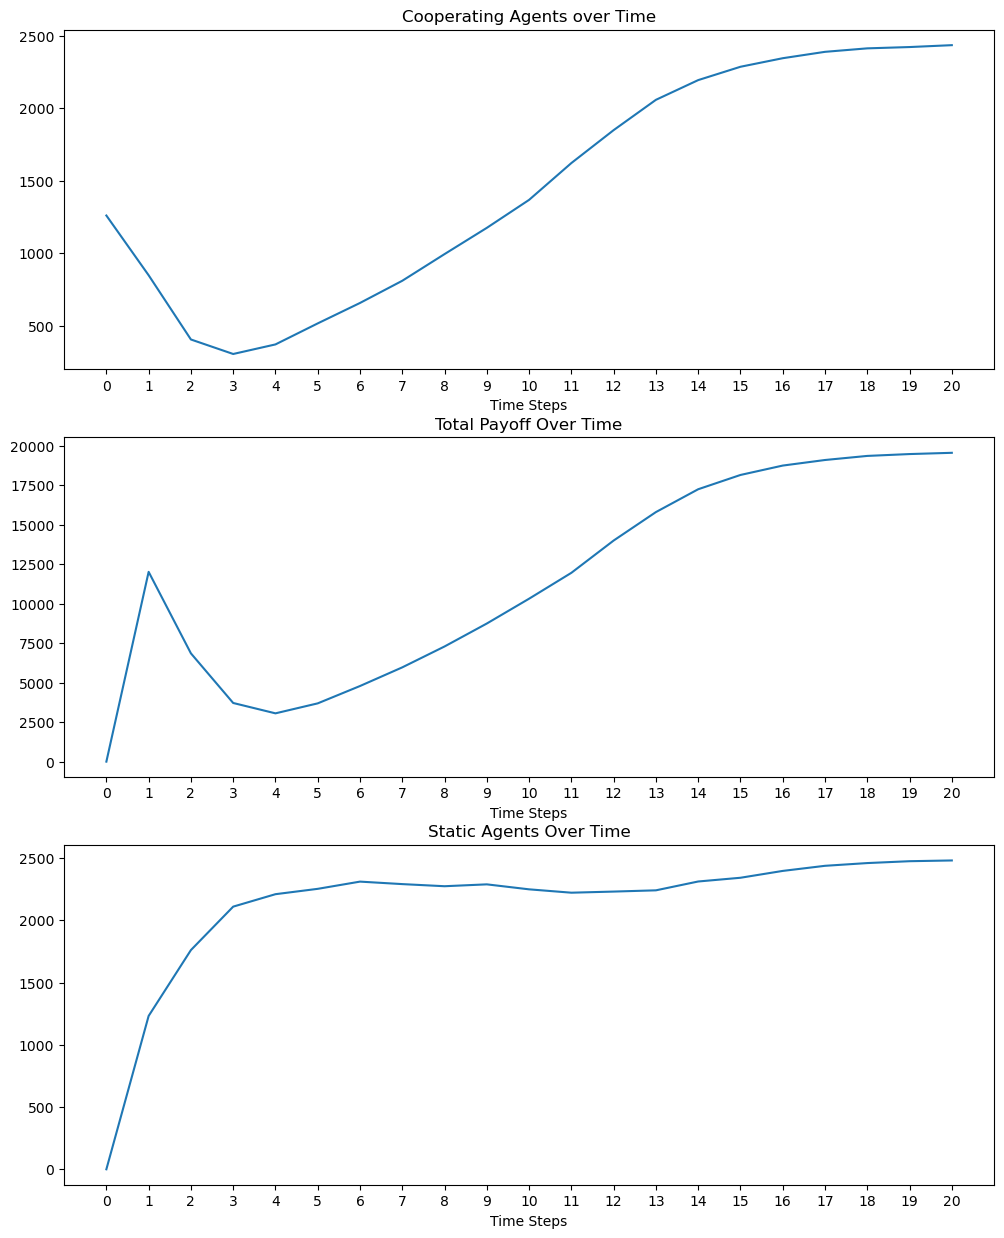

In [16]:
m = PdGrid(50, 50, "Random", seed=seed, radius=1)
run_model(m)

In [17]:
m.datacollector.get_model_vars_dataframe()

,Cooperating_Agents,total_pay_off,Static_Agents
0,1259,0.0,0
1,847,12016.6,1232
2,404,6856.0,1761
3,304,3713.8,2110
4,370,3057.8,2210
5,515,3690.0,2253
6,656,4788.2,2311
7,809,5969.4,2291
8,993,7292.2,2274
9,1174,8745.6,2289


## Simultaneous Activation

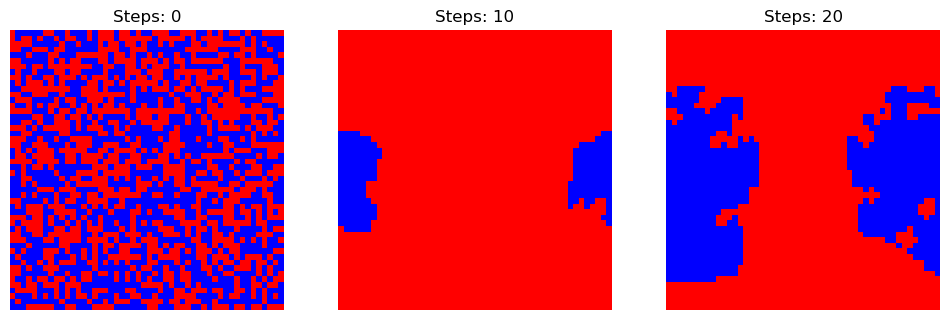

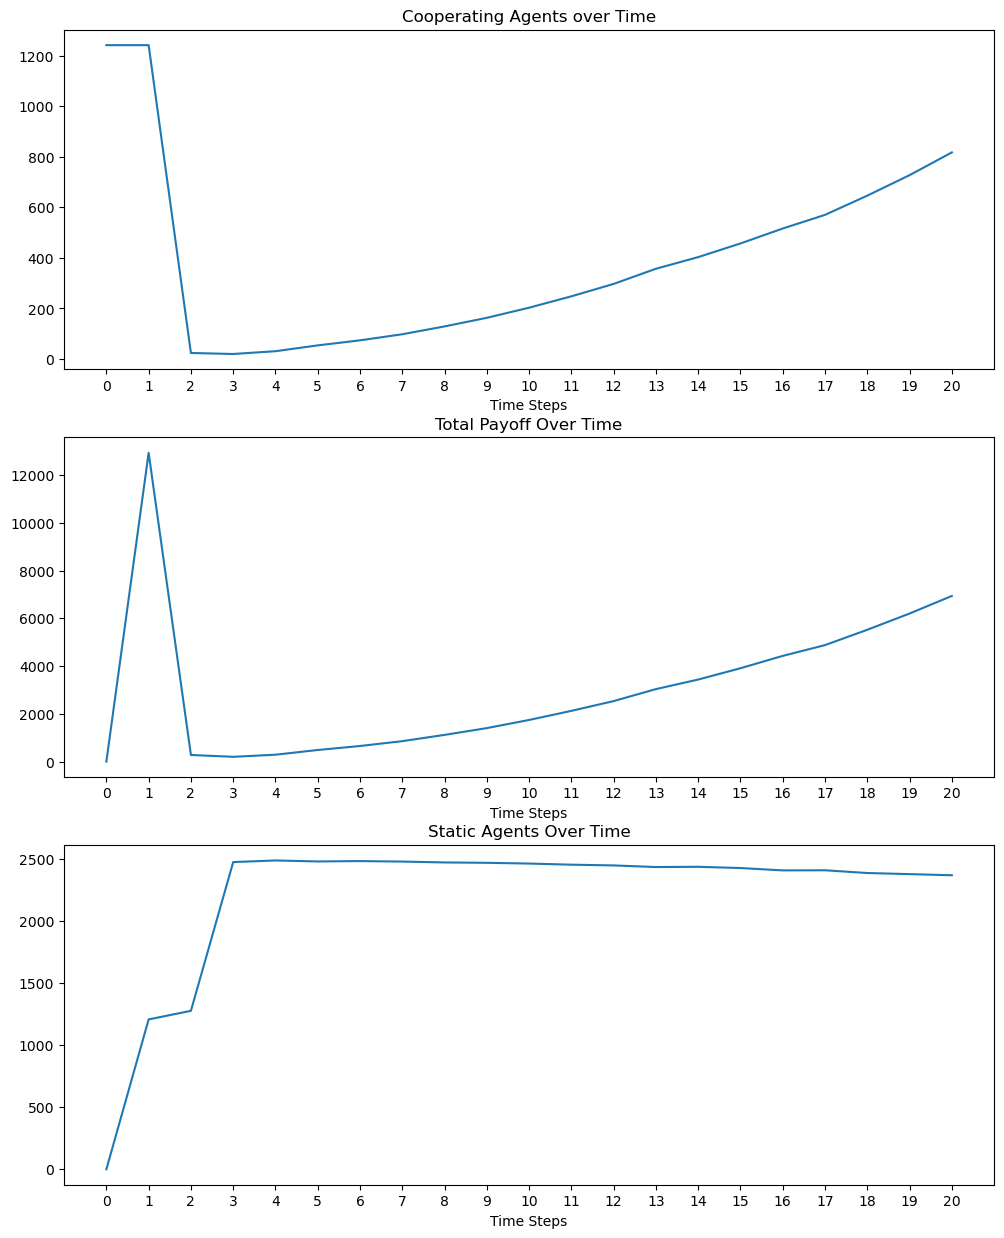

In [18]:
m = PdGrid(50, 50, "Simultaneous", seed=1,radius= 1)
run_model(m)

In [19]:
m.datacollector.get_model_vars_dataframe()

,Cooperating_Agents,total_pay_off,Static_Agents
0,1241,0.0,0
1,1241,12928.0,1206
2,24,278.4,1275
3,20,202.0,2472
4,31,290.0,2485
5,54,487.2,2477
6,74,654.4,2480
7,98,857.2,2476
8,129,1119.6,2469
9,163,1403.6,2466


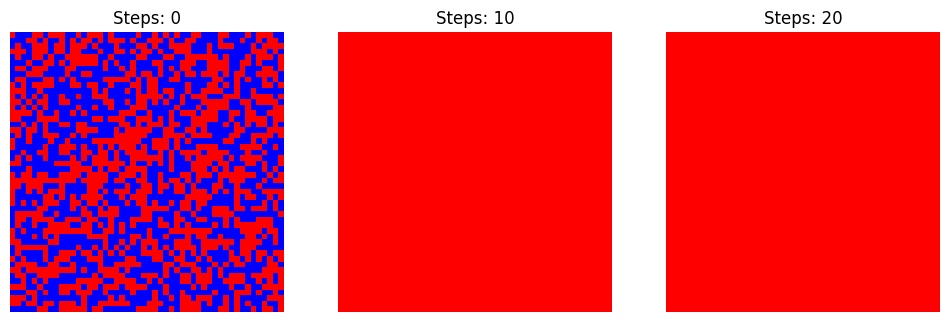

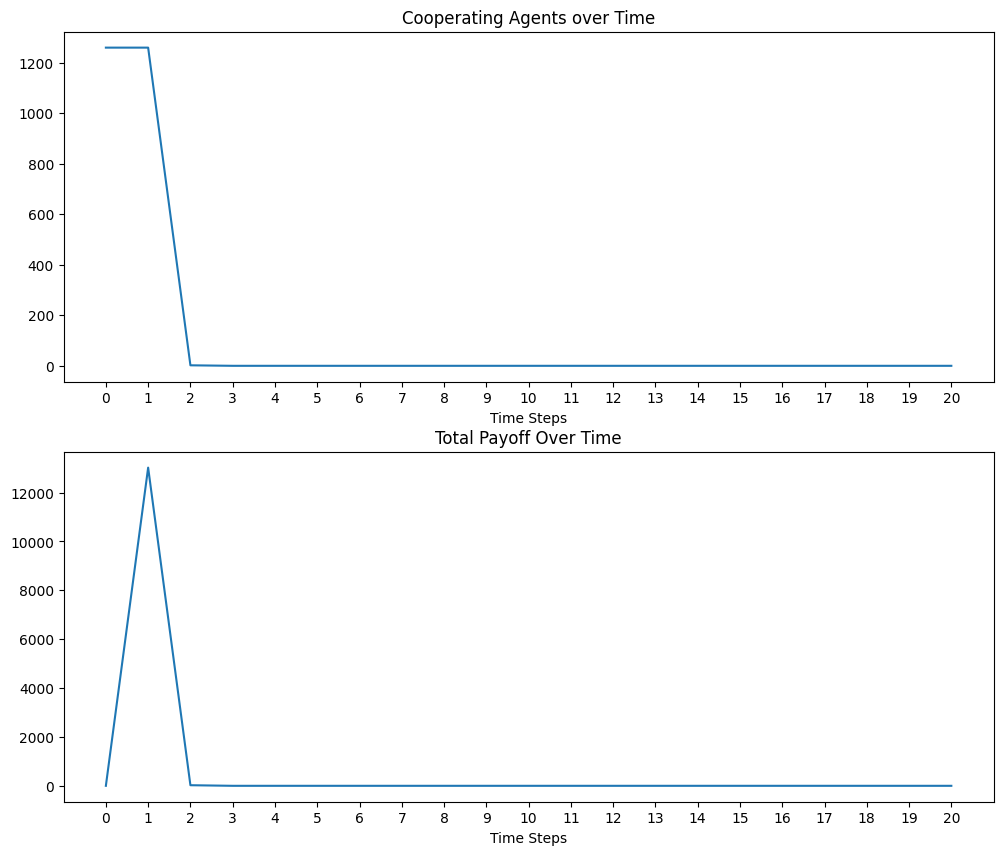

In [16]:

m = PdGrid(50, 50, "Simultaneous", seed = seed, radius= 3)
run_model(m)